## 🌍 Language Landscape and Multilingual Analysis

This module explores how different languages are represented and used across community notes.  
It aims to understand the linguistic composition of the dataset, how language distribution compares to the global Twitter user base,  
and how multilingual behavior (users writing in multiple languages) may affect the content and reach of notes.  

The analysis proceeds in stages:
1. Detect the primary language of each note using automated language detection.
2. Compare sample language frequencies against global Twitter language proportions to identify over- or under-representation.
3. Examine multilingual activity by determining how often individual users write in multiple languages and which combinations are most common.  

Together, these analyses provide a clearer picture of the language landscape within community notes and  
highlight potential linguistic biases or cultural patterns in user contributions.

In [3]:
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip install polars
%pip install langdetect
%pip install countryinfo
%pip install langcodes
%pip install openai
%pip install dotenv
%pip install --upgrade typing_extensions


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [51]:
users = 500

In [25]:
# Load the CSV
df = pl.read_csv(f"/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_{users}users.csv")

# Drop the unneeded columns
df_clean = df.drop(["believable", "harmful", "validationDifficulty"])

# Preview to confirm
print(df_clean.shape)


df_clean.write_csv(f"/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_{users}users_clean.csv")
df_clean.head()

(1695, 33)


noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote,_processing_commit_hash,_processed_at,_data_date,enrollmentState,successfulRatingNeededToEarnIn,timestampOfLastStateChange,timestampOfLastEarnOut,modelingPopulation,modelingGroup,numberOfTimesEarnedOut,_processing_commit_hash_right,_processed_at_right,_data_date_right
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str,i64,i64,i64,str,f64,i64,str,str,str
1891771514908770319,"""401C51AE517F6C18ECC0103B736463…",1739868451226,1891024273554235574,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,1,0,1,0,1,0,0,0,0,0,0,1,"""Como dice en el mismo hilo el …",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27"""
1879446733907800202,"""401C51AE517F6C18ECC0103B736463…",1736929994452,1879162962029461897,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""El post no pone el link a la n…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27"""
1877349067195335147,"""401C51AE517F6C18ECC0103B736463…",1736429871735,1876975333603152147,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""El uso de la expresión &quot;l…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27"""
1875898041632190817,"""401C51AE517F6C18ECC0103B736463…",1736083920282,1875610655404732773,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""Como el propio artículo indica…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27"""
1876594640612196610,"""401C51AE517F6C18ECC0103B736463…",1736250002421,1876454527383347276,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""Mucha gente que aparecería com…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27"""


## 🈺 Language Detection and Tagging

This block detects the primary language of each note’s text using an automated language identification model  
and appends the result as a new column, `language_detected`.  
It serves as the foundation for subsequent analyses by enabling language-based grouping, filtering,  
and cross-comparison of notes across users and regions.


In [46]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results (langdetect is non-deterministic by default)
DetectorFactory.seed = 42

# Load your cleaned CSV
df = pl.read_csv(f"/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_{users}users_clean.csv")

# Define a safe detection function
def safe_detect(text: str) -> str:
    if not isinstance(text, str) or text.strip() == "":
        return "unknown"
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Apply detection and create a new column
df_with_lang = df.with_columns(
    pl.col("summary").map_elements(safe_detect).alias("language_detected")
)

# Save the enriched version
df_with_lang.write_csv(f"/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_{users}users_lang.csv")

df_with_lang.head()

noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote,_processing_commit_hash,_processed_at,_data_date,enrollmentState,successfulRatingNeededToEarnIn,timestampOfLastStateChange,timestampOfLastEarnOut,modelingPopulation,modelingGroup,numberOfTimesEarnedOut,_processing_commit_hash_right,_processed_at_right,_data_date_right,language_detected
i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str,i64,i64,i64,str,f64,i64,str,str,str,str
1891771514908770319,"""401C51AE517F6C18ECC0103B736463…",1739868451226,1891024273554235574,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,1,0,1,0,1,0,0,0,0,0,0,1,"""Como dice en el mismo hilo el …",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27""","""es"""
1879446733907800202,"""401C51AE517F6C18ECC0103B736463…",1736929994452,1879162962029461897,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""El post no pone el link a la n…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27""","""es"""
1877349067195335147,"""401C51AE517F6C18ECC0103B736463…",1736429871735,1876975333603152147,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""El uso de la expresión &quot;l…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27""","""es"""
1875898041632190817,"""401C51AE517F6C18ECC0103B736463…",1736083920282,1875610655404732773,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""Como el propio artículo indica…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27""","""es"""
1876594640612196610,"""401C51AE517F6C18ECC0103B736463…",1736250002421,1876454527383347276,"""MISINFORMED_OR_POTENTIALLY_MIS…",0,0,0,0,1,0,0,0,0,0,0,0,1,"""Mucha gente que aparecería com…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""earnedIn""",5,1735864278938,1,"""CORE""",14.0,0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:07:20.958114""","""2025-09-27""","""es"""


## 📊 Language Distribution Summary

This block aggregates all detected languages to calculate the total note count and percentage share of each language within the sample.  
The resulting table provides a quick overview of the linguistic composition of the dataset,  
serving as a baseline for comparing language representation against global Twitter usage patterns.


In [47]:
# Total number of detected languages excluding "unknown"
num_unique_langs = (
    df_with_lang
    .filter(pl.col("language_detected") != "unknown")
    .select(pl.col("language_detected").n_unique())
    .item()
)

# Count notes per language
lang_counts = (
    df_with_lang
    .group_by("language_detected")
    .agg(pl.len().alias("note_count"))
    .sort("note_count", descending=True)
)

# Add percentage column
total_notes = df_with_lang.height
lang_counts = lang_counts.with_columns(
    (pl.col("note_count") / total_notes * 100).round(2).alias("percent_of_sample")
)

# Display outputs cleanly in Jupyter
print(f"There are {num_unique_langs} unique languages in the sample")
lang_counts

There are 31 unique languages in the sample


language_detected,note_count,percent_of_sample
str,u32,f64
"""en""",983,57.99
"""es""",175,10.32
"""pt""",135,7.96
"""ja""",93,5.49
"""fr""",91,5.37
…,…,…
"""tl""",1,0.06
"""so""",1,0.06
"""fa""",1,0.06


## 🌐 Global Comparison of Language Representation

This section integrates external Twitter user data to compare language representation in the sample  
against estimated global usage patterns. It first maps each country to its primary ISO 639-1 language code,  
then aggregates total Twitter users per language to calculate their global percentage share.  
These global proportions are joined with the sample’s language frequencies to measure disparities—  
highlighting which languages are over- or under-represented within community notes relative to Twitter’s broader user base.  
The resulting differences and ratios are visualized through comparative bar charts to illustrate linguistic imbalances.


In [41]:
import polars as pl
import json

# Load country → lang_code mapping
with open("/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/country_lang_map_raw.json") as f:
    country_to_lang = json.load(f)

# Load Twitter user CSV
df_users = pl.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/twitter-x-users-by-country-2025.csv"
)

# Map countries to language codes
df_users = df_users.with_columns(
    pl.col("country").map_elements(lambda c: country_to_lang.get(c, "unknown")).alias("lang_code")
)

df_users = df_users[:-1]

df_users

flagCode,country,TwitterUsers_2024,lang_code
str,str,i64,str
"""US""","""United States""",111300000,"""en"""
"""JP""","""Japan""",75800000,"""ja"""
"""IN""","""India""",27300000,"""hi"""
"""ID""","""Indonesia""",27100000,"""id"""
"""GB""","""United Kingdom""",25900000,"""en"""
…,…,…,…
"""BL""","""Saint Barthelemy""",1900,"""fr"""
"""VA""","""Vatican City""",1800,"""la"""
"""ER""","""Eritrea""",1700,"""ti"""


In [42]:
# Aggregate total Twitter users per language code
lang_user_totals = (
    df_users
    .group_by("lang_code")
    .agg(pl.col("TwitterUsers_2024").sum().alias("total_users"))
    .filter(pl.col("lang_code") != "unknown")
)

# Compute percentage share per language
total_users = lang_user_totals["total_users"].sum()
lang_user_totals = lang_user_totals.with_columns(
    (pl.col("total_users") / total_users * 100).round(2).alias("percent_of_twitter_users")
)

lang_user_totals

lang_code,total_users,percent_of_twitter_users
str,i64,f64
"""sr""",1067200,0.17
"""sg""",4800,0.0
"""hy""",161500,0.03
"""nl""",11422900,1.8
"""tk""",12500,0.0
…,…,…
"""sv""",2600000,0.41
"""sl""",239400,0.04
"""kl""",6500,0.0


In [48]:
# Join sample and global Twitter data and find difference
lang_compare = (
    lang_counts
    .join(
        lang_user_totals,
        left_on="language_detected",
        right_on="lang_code",
        how="left"
    )
    .with_columns(
        (pl.col("percent_of_sample") - pl.col("percent_of_twitter_users"))
        .round(2)
        .alias("diff_vs_twitter")
    )
    .sort("percent_of_sample", descending=True)
)
lang_compare.write_csv("/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_500users_lang_distribution.csv")
lang_compare

language_detected,note_count,percent_of_sample,total_users,percent_of_twitter_users,diff_vs_twitter
str,u32,f64,i64,f64,f64
"""en""",983,57.99,165312100,26.07,31.92
"""es""",175,10.32,63122400,9.96,0.36
"""pt""",135,7.96,25204600,3.98,3.98
"""ja""",93,5.49,75800000,11.96,-6.47
"""fr""",91,5.37,19524100,3.08,2.29
…,…,…,…,…,…
"""tl""",1,0.06,11100000,1.75,-1.69
"""so""",1,0.06,147200,0.02,0.04
"""fa""",1,0.06,null,null,null


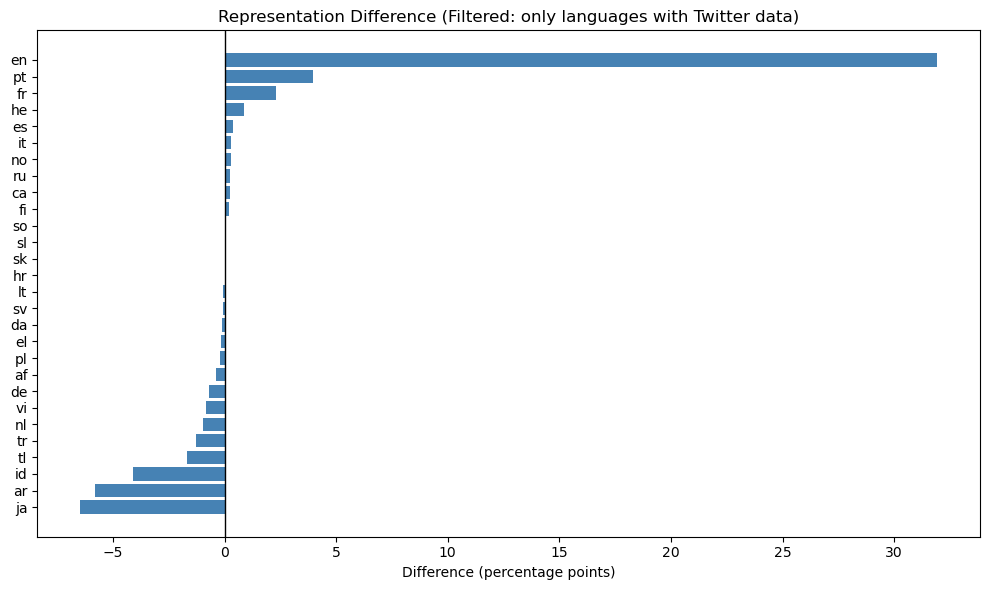

In [49]:
import polars as pl
import matplotlib.pyplot as plt

lang_compare = pl.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_500users_lang_distribution.csv"
)

# Drop rows that have no Twitter data (null)
lang_compare_clean = lang_compare.filter(
    pl.col("percent_of_twitter_users").is_not_null()
)

# Optional: compute difference column again
lang_compare_clean = lang_compare_clean.with_columns(
    (pl.col("percent_of_sample") - pl.col("percent_of_twitter_users"))
    .round(2)
    .alias("diff_vs_twitter")
)

# Plot difference chart
df = lang_compare_clean.sort("diff_vs_twitter").to_pandas()
plt.figure(figsize=(10,6))
plt.barh(df["language_detected"], df["diff_vs_twitter"], color="steelblue")
plt.axvline(0, color="black", linewidth=1)
plt.title("Representation Difference (Filtered: only languages with Twitter data)")
plt.xlabel("Difference (percentage points)")
plt.tight_layout()
plt.show()


In [52]:
import polars as pl

df_with_lang = pl.read_csv(
    f"/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/sampled_notes_{users}users_lang.csv"
)
# Count how many distinct languages each user wrote in
user_lang_counts = (
    df_with_lang
    .group_by("noteAuthorParticipantId")
    .agg(pl.col("language_detected").n_unique().alias("num_languages"))
    .sort("num_languages", descending=True)
)

# Overall stats
num_multilingual_users = user_lang_counts.filter(pl.col("num_languages") > 1).height
total_users = user_lang_counts.height
share_multilingual = round(num_multilingual_users / total_users * 100, 2)

print(f"Out of {total_users} users, {num_multilingual_users} ({share_multilingual}%) wrote in more than one language.")
user_lang_counts.head()

Out of 500 users, 97 (19.4%) wrote in more than one language.


noteAuthorParticipantId,num_languages
str,u32
"""DA458E33269A6EB5B0E1A14FADDF72…",4
"""DB2BC799E1CD7A9E942365E625668C…",4
"""4EF547687BD3FB27F4FCBFF5A6A32B…",4
"""432152BA8D11C5E19A3581B9078363…",3
"""0FDE3602ACB9B075594642ADFE412B…",3


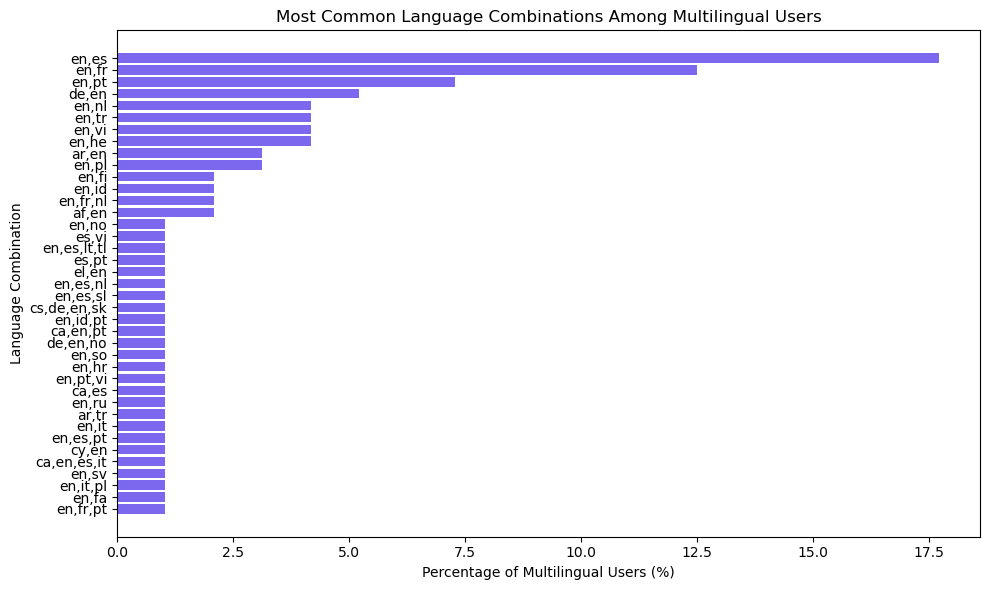

lang_combo,user_count,percent_of_multilinguals
str,u32,f64
"""en,es""",17,17.71
"""en,fr""",12,12.5
"""en,pt""",7,7.29
"""de,en""",5,5.21
"""en,nl""",4,4.17
…,…,…
"""ca,en,es,it""",1,1.04
"""en,sv""",1,1.04
"""en,it,pl""",1,1.04


In [56]:
import polars as pl
import matplotlib.pyplot as plt

# Aggregate each user's set of languages
user_lang_sets = (
    df_with_lang
    .group_by("noteAuthorParticipantId")
    .agg(pl.col("language_detected").unique().alias("languages"))
)

# Convert list of languages → comma-separated string (excluding 'unknown')
user_lang_sets = user_lang_sets.with_columns(
    pl.col("languages")
    .map_elements(lambda langs: ",".join(sorted([l for l in langs if l != "unknown"])))
    .alias("lang_combo")
)

# Add count of languages per user
user_lang_sets = user_lang_sets.with_columns(
    pl.col("lang_combo").map_elements(lambda x: len(x.split(",")) if x else 0).alias("num_langs")
)

# Filter to multilingual users only (exclude singles)
user_lang_sets_multi = user_lang_sets.filter(pl.col("num_langs") > 1)

# Count how common each combination is among multilingual users
lang_combo_counts = (
    user_lang_sets_multi
    .group_by("lang_combo")
    .agg(pl.len().alias("user_count"))
    .sort("user_count", descending=True)
)

# Add percentage column
total_multi_users = lang_combo_counts["user_count"].sum()
lang_combo_counts = lang_combo_counts.with_columns(
    (pl.col("user_count") / total_multi_users * 100).round(2).alias("percent_of_multilinguals")
)

# Convert to pandas for plotting
df_combo = lang_combo_counts.filter(pl.col("lang_combo") != "").to_pandas()

# --- Plot ---
plt.figure(figsize=(10,6))
plt.barh(df_combo["lang_combo"], df_combo["percent_of_multilinguals"], color="mediumslateblue")
plt.gca().invert_yaxis()
plt.title("Most Common Language Combinations Among Multilingual Users")
plt.xlabel("Percentage of Multilingual Users (%)")
plt.ylabel("Language Combination")
plt.tight_layout()
plt.show()

# Display the table if running in Jupyter
lang_combo_counts
